# Introduction to NumPy


The `numpy` (**num**erical **Py**thon) package is an extensive set of tools for working with **arrays** in Python. `numpy` is at the heart of efficient data science and scientific computation in Python. 


## Arrays 

Recall that, in standard Python, we can create a list containing arbitrary objects, each of which may be stored in disparate parts of the computer's memory. For example: 

In [2]:
L = [1, "seyoon", 20.20, (9,2)]
for item in L:
    print(id(item))
# easy to manipulate, iterable, can contain different types of data
# slow, very slow, much slower than working with a C++ array

4342736088
4417855856
4415205360
4415660608


Because these items occupy different memory locations, operations that take place directly on lists typically require allocating memory many times. 

On the other hand, arrays as defined via `numpy` occupy a single, contiguous(连贯的) chunk of memory. This allows `numpy` arrays to occupy significantly less memory, and makes operations involving `numpy` arrays correspondingly faster. This performance improvement is usually only realized for arrays that contain a single data type. For more details on this, see the accompanying [reading](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html) for this lecture.  

Arrays are ideally suited for operating on large chunks of numbers or text. Let's look at a simple example to see how `numpy` arrays can dramatically improve the performance of our code. The `%timeit` decorator is a "magic" command that will run the supplied line of code many times and print out some measurse of how quickly the code executed. 

In [3]:
def add_lists(L1, L2):
    return [L1[i] + L2[i] for i in range(len(L1))]

In [4]:
L1 = list(range(100))
L2 = list(range(100))

%timeit add_lists(L1, L2)

1.76 µs ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Now let's try this with `numpy` arrays. An especially useful way to create an array is to call `np.array()` on a list. 

In [6]:
import numpy as np

a1 = np.array(L1) # this how to create an array in Numpy. 
a2 = np.array(L2)
%timeit a1 + a2

188 ns ± 0.843 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


The same operation (entrywise addition) is almost 10 times faster when using `numpy` arrays! 

Arrays can also contain strings. This is not very common, and in most cases the arrays we write in this class will contain integers or floats. 

In [7]:
s = "to boldly go"
np.array(s.split())

array(['to', 'boldly', 'go'], dtype='<U6')

## Vectorization

You might have noticed that, in the code above, we were able to do `a1 + a2` and get the expected result. As you may have seen already, this doesn't exactly work for lists: `L1 + L2` concatenates the lists, rather than computing the entrywise sum. 

A *vectorized* function is one that operates on all elements of an array in entrywise fashion. So, we saw above that the `+` function, when applied to arrays, is vectorized. The `numpy` module includes a large number of vectorized functions. These should almost always be used when working with arrays: 

In [ ]:
# entrywise array multiplication

a1 = np.array([1, 2, 3, 4, 5])
a2 = np.array([6, 7, 8, 9, 10])

a1*a2

array([ 6, 14, 24, 36, 50])

In [7]:
# entrywise scalar multiplication
2*a1

array([ 2,  4,  6,  8, 10])

In [8]:
# scalar addition 
2 + a1

array([3, 4, 5, 6, 7])

Vectorized functions operating on `numpy` arrays can be vastly more efficient than approaches that operate on lists one-by-one. We already saw the example of vectorized addition. Here's another one: 

In [8]:
import math

def list_sin(L):
    return [math.sin(l) for l in L]

In [9]:
a = np.linspace(0, 2*np.pi, 101)
L = list(a)

In [10]:
%timeit list_sin(L)

2.41 µs ± 27.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
# faster and way easier to write! 
%timeit np.sin(a)

414 ns ± 3.67 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Let's check that this works: 

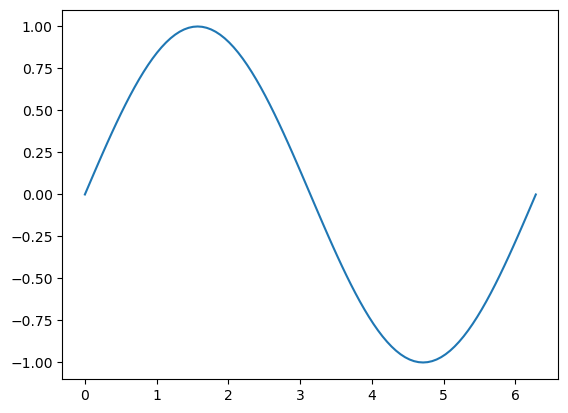

In [13]:
a = np.linspace(0, 2*np.pi, 101)
L = list(a)
to_plot = list_sin(L)

from matplotlib import pyplot as plt
plt.plot(L, to_plot)

In [14]:
# # how fast is it? 
%timeit list_sin(L)

3.68 µs ± 25.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Our `for`-loop based approach works, but....

In [ ]:
# works as a one-liner
plt.plot(a, np.sin(a))

## "Should I use `numpy` arrays?"

If you will operate on one or more large sets of numbers and are considering writing `for`-loops, stop. Ask yourself whether you can achieve your task with `numpy` arrays instead. 90% of the time, `numpy`-based code is faster to write and faster to execute. 

## "Should I use `for`-loops?"

When working with lists and other basic data structures, yes, absolutely! When working with `numpy` arrays, however, writing `for`-loops is almost always the wrong thing to do. Find a way using vectorized `numpy` code. 